In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_NG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.11388,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,NaN
1,NaN,0.206580,0.48861,1.43430,NaN,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.84450
2,NaN,0.217560,1.61050,1.33710,NaN,NaN,3.99630,2.21730,3.90290,1.51440,2.43890,0.63358
3,NaN,-0.061874,NaN,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.73460
4,NaN,-1.006000,2.88220,1.56160,3.20140,3.37740,NaN,0.98475,3.10940,NaN,3.91720,0.94706
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.86710,-4.729200,3.72580,3.70480,NaN,0.35406,1.62780,3.29400,NaN,0.15740,0.46504,2.85140
396,0.26463,-6.107600,3.90540,1.33770,1.41870,1.68610,NaN,3.79360,0.12790,NaN,3.36580,3.75560
397,NaN,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,NaN,0.95496,1.52630,2.12380
398,7.29300,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,NaN,NaN,3.43740,1.81620,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	105
float64		column 2	53
float64		column 3	39
float64		column 4	65
float64		column 5	79
float64		column 6	104
float64		column 7	91
float64		column 8	65
float64		column 9	92
float64		column 10	66
float64		column 11	78
float64		column 12	105


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,295.000000,347.000000,361.000000,335.000000,321.000000,296.000000,309.000000,335.000000,308.000000,334.000000,322.000000,295.000000
mean,-0.170761,0.190447,2.075265,1.903924,1.934170,2.003022,2.046670,1.942144,1.973291,2.031159,2.000120,1.988879
std,2.387161,2.704156,1.105280,1.120881,1.128695,1.092069,1.144917,1.091423,1.089066,1.123540,1.120111,1.156844
min,-7.771000,-6.828400,0.005583,0.011551,0.000530,0.044882,0.003618,0.007321,0.007216,0.055837,0.006786,0.001972
25%,-0.650560,-0.667250,1.178100,0.985995,0.900480,1.151650,1.086100,1.074050,1.142900,1.094300,1.036000,1.024150
50%,-0.117950,0.072523,2.108200,1.819600,1.954400,2.067600,2.120400,1.895000,2.041100,2.056000,1.973000,1.964300
75%,0.480560,0.897005,2.987100,2.797750,2.877400,2.910825,2.968500,2.855300,2.813150,3.039275,2.942975,2.945600
max,7.293000,6.777100,3.951500,3.985700,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

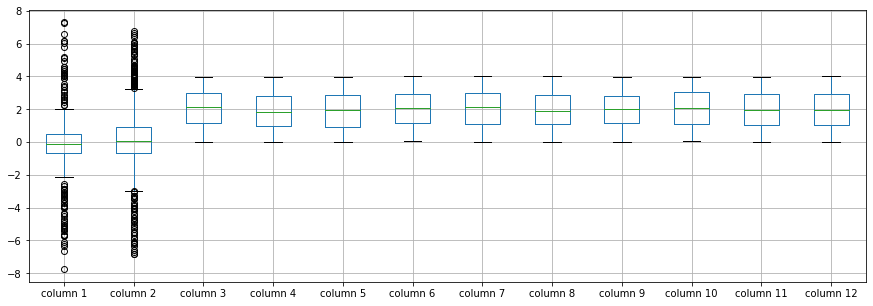

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.170761
column 2     0.190447
column 3     2.075265
column 4     1.903924
column 5     1.934170
column 6     2.003022
column 7     2.046670
column 8     1.942144
column 9     1.973291
column 10    2.031159
column 11    2.000120
column 12    1.988879
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.035836,-0.049999,-0.116256,0.051486,0.055457,-0.046893,-0.012517,0.015549,-0.025297,0.021141,-0.065146
column 2,0.035836,1.000000,-0.061479,0.028092,-0.009434,-0.052884,0.012316,-0.050690,0.057473,0.013850,-0.001796,0.150986
column 3,-0.049999,-0.061479,1.000000,-0.031906,-0.003062,0.034898,-0.071294,0.055491,0.091347,-0.040387,-0.098420,-0.013835
column 4,-0.116256,0.028092,-0.031906,1.000000,-0.033318,0.033815,-0.029571,0.045231,0.008457,-0.006756,-0.050088,-0.029323
column 5,0.051486,-0.009434,-0.003062,-0.033318,1.000000,0.036910,-0.066299,0.006391,-0.039758,0.065872,-0.039326,-0.056956
column 6,0.055457,-0.052884,0.034898,0.033815,0.036910,1.000000,-0.035141,0.023286,0.050407,-0.087774,0.017834,-0.048974
column 7,-0.046893,0.012316,-0.071294,-0.029571,-0.066299,-0.035141,1.000000,-0.019230,0.117338,-0.040167,0.006917,-0.099228
column 8,-0.012517,-0.050690,0.055491,0.045231,0.006391,0.023286,-0.019230,1.000000,0.059308,-0.078123,-0.076904,0.032666
column 9,0.015549,0.057473,0.091347,0.008457,-0.039758,0.050407,0.117338,0.059308,1.000000,-0.020070,0.044790,0.002505
column 10,-0.025297,0.013850,-0.040387,-0.006756,0.065872,-0.087774,-0.040167,-0.078123,-0.020070,1.000000,0.029697,0.008447


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+45,12+45+45,12+45+45+45,12+45+45+45+45,12+45+45+45+45+45,12+45+45+45+45+45+45,12+45+45+45+45+45+45+45,12+45+45+45+45+45+45,12+45+45+45+45+45,12+45+45+45+45,12+45+45+45,12+45+45,12+45,12], vae_layer = False, seed = 45)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 22.15166618347168
Epoch: 1 , loss: 22.055426940917968
Epoch: 2 , loss: 22.000359344482423
Epoch: 3 , loss: 21.48060806274414
Epoch: 4 , loss: 19.887677459716798
Epoch: 5 , loss: 19.253490447998047
Epoch: 6 , loss: 19.11046173095703
Epoch: 7 , loss: 18.705561256408693
Epoch: 8 , loss: 18.538564376831054
Epoch: 9 , loss: 18.303430709838867
Epoch: 10 , loss: 17.978757553100586
Epoch: 11 , loss: 17.907900619506837
Epoch: 12 , loss: 17.678422927856445
Epoch: 13 , loss: 17.379994850158692
Epoch: 14 , loss: 17.170945892333986
Epoch: 15 , loss: 17.235054321289063
Epoch: 16 , loss: 16.793003654479982
Epoch: 17 , loss: 16.69345802307129
Epoch: 18 , loss: 16.41452365875244
Epoch: 19 , loss: 16.29881904602051
Epoch: 20 , loss: 16.16656677246094
Epoch: 21 , loss: 15.98491153717041
Epoch: 22 , loss: 16.01308204650879
Epoch: 23 , loss: 16.062807502746583
Epoch: 24 , loss: 15.721350555419923
Epoch: 25 , loss: 15.67993

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.705950
column 2     0.128930
column 3     1.058100
column 4     2.136200
column 5     2.148600
column 6     2.245800
column 7     3.727700
column 8     0.979329
column 9     1.943500
column 10    1.987000
column 11    2.470700
column 12    0.368260
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.397914
1,-0.083736,0.0,0.000000,0.0,-2.506390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.055931,0.0,0.000000,0.0,-3.225711,-0.638334,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.399679,0.0,0.882725,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.246193,0.0,0.000000,0.0,0.000000,0.000000,-1.243496,0.000000,0.000000,-3.374941,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.0,0.000000,0.0,1.809891,0.000000,0.000000,0.000000,1.605678,0.000000,0.000000,0.000000
396,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.375134,0.000000,0.000000,0.922810,0.000000,0.000000
397,3.321427,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-2.057433,0.000000,0.000000,0.000000
398,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.991713,0.219274,0.000000,0.000000,1.176832


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(58.88922660967061, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.3606762644229108

In [18]:
new_df.iloc[66,:]

column 1     0.822720
column 2     0.267760
column 3     0.403430
column 4     0.623054
column 5     0.611886
column 6     2.583000
column 7     2.830600
column 8     3.074200
column 9     1.538100
column 10    0.246200
column 11    0.853340
column 12    3.604400
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.978900,1.83630,2.886600,2.469600,0.215410,3.090000,0.783430,0.510350,0.030430,1.498574
1,-0.054347,0.206580,0.488610,1.43430,0.623510,1.277800,1.428500,0.143330,1.194800,2.131800,0.984730,3.844500
2,-0.059469,0.217560,1.610500,1.33710,0.542489,0.571666,3.996300,2.217300,3.902900,1.514400,2.438900,0.633580
3,-0.139481,-0.061874,1.247585,0.33278,0.190270,0.567160,1.660100,2.352700,0.661260,3.135100,3.938100,3.734600
4,-0.022207,-1.006000,2.882200,1.56160,3.201400,3.377400,0.279104,0.984750,3.109400,0.281459,3.917200,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.725800,3.70480,2.692581,0.354060,1.627800,3.294000,2.690678,0.157400,0.465040,2.851400
396,0.264630,-6.107600,3.905400,1.33770,1.418700,1.686100,1.470234,3.793600,0.127900,1.465300,3.365800,3.755600
397,-0.157673,-1.993300,1.324800,1.77210,2.550900,1.470100,0.925400,1.841100,1.419867,0.954960,1.526300,2.123800
398,7.293000,-0.411470,2.494800,0.39655,2.999000,3.410100,2.951600,1.269713,1.209864,3.437400,1.816200,1.264044


In [20]:
imputations[-1].to_excel("Difdoug_NG_20(imp).xlsx", index=False, header=False)